In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class CharacterDrawer:
    def __init__(self):
        self.lst2 = {}
        self.backIndex = 0
        self.characterIndx = 0
        self.img = None

    def get_input(self):
        self.draw_character(self.lst2[int(0)])

    def read_file(self, file_path):
        with open(file_path, encoding='utf-8') as file_obj:
            for line in file_obj:
                number_lst = line.split(',')
                idx = 3
                temp_lst = []
                self.lst2[self.characterIndx] = []
                while number_lst[idx] != '':
                    if number_lst[idx] == '-64':
                        self.lst2[self.characterIndx].append(temp_lst.copy())
                        temp_lst.clear()
                        idx = idx + 2
                        continue
                    pointx = number_lst[idx]
                    pointy = number_lst[idx + 1]
                    idx += 2
                    temp_lst.append((int(pointx), int(pointy)))
                self.characterIndx += 1

    def draw_character(self, lst_word):
        self.backIndex = 0
        print("lstowrld ", lst_word)
        self.img = np.zeros([280, 320, 3], np.uint8) + 255
        for lst in lst_word:
            i = 0
            while i < len(lst) - 1:
                cv2.line(self.img, (lst[i][0] * 7 + 110, -1 * lst[i][1] * 7 + 130),
                         (lst[i + 1][0] * 7 + 110, -1 * lst[i + 1][1] * 7 + 130), (0, 0, 0), 2)
                i += 1
            cv2.imshow('image', self.img)
            cv2.waitKey(800)
        plt.ylim(0, 280)
        plt.xlim(0, 300)
        plt.imshow(self.img)
        plt.show()

    def back(self, lst_word):
        self.img = np.zeros([500, 500, 3], np.uint8) + 255
        for lst in lst_word[:-1 - self.backIndex]:
            i = 0
            while i < len(lst) - 1:
                cv2.line(self.img, (lst[i][0] * 10 + 250, lst[i][1] * 10 + 250),
                         (lst[i + 1][0] * 10 + 250, lst[i + 1][1] * 10 + 250), (0, 0, 0), 2)
                i += 1
        cv2.imshow('image', self.img)
        self.backIndex += 1

    def save(self):
        cv2.imwrite('a.jpg', self.img)


lstowrld  [[(-6, -7), (-2, -7), (-4, -2), (-2, 0), (-2, 3), (-4, 4), (-6, 3), (-6, 3)], [(-6, -7), (-6, 8), (-6, 8)], [(-1, -7), (8, -7), (8, -7)], [(6, -7), (6, 7), (4, 7), (4, 7)], [(0, -3), (0, 2), (0, 2)], [(0, -3), (3, -3), (3, 3), (3, 3)], [(0, 2), (3, 2), (3, 2)]]


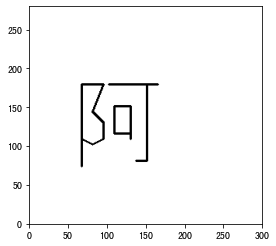

In [3]:
if __name__ == '__main__':
    drawer = CharacterDrawer()
    drawer.read_file('hz（去噪声）.txt')
    drawer.get_input()
    